In [1]:
from keras.datasets import mnist
from keras.layers import *
from keras.models import Sequential,Model
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import keras

In [2]:
(X_train,_),(_,_)=mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
def display_img(samples=25):
    noise=np.random.normal(0,1,size=(samples,NOISE_DIM))
    gen_img=generator.predict(noise)
    plt.figure(figsize=(10,10))
    for i in range(samples):
        plt.subplot(5,5,i+1)
        plt.imshow(gen_img[i].reshape(28,28),cmap="binary")
        plt.axis('off')
    plt.show()

In [6]:
X_train=(X_train-127.5)/127.5

In [7]:
epoch=50
batch_size=256
half_batch=128
batch_no=int(X_train.shape[0]/batch_size)
NOISE_DIM=100
adam=Adam(lr=2e-4,beta_1=0.5)

In [8]:
generator=Sequential()
generator.add(Dense(units=7*7*128,input_shape=(NOISE_DIM,)))
generator.add(Reshape((7,7,128)))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(64,(3,3),strides=(2,2),padding='same'))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(1,(3,3),strides=(2,2),padding='same',activation='tanh'))
generator.compile(loss=keras.losses.binary_crossentropy,optimizer=adam)
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6272)              633472    
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 128)         0         
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 7, 7, 128)         512       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 64)        73792     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        2

In [9]:
descriminator=Sequential()
descriminator.add(Conv2D(64,kernel_size=(3,3),strides=(2,2),padding='same',input_shape=(28,28,1)))
descriminator.add(LeakyReLU(0.2))

descriminator.add(Conv2D(128,kernel_size=(3,3),strides=(2,2),padding='same'))
descriminator.add(LeakyReLU(0.2))

descriminator.add(Flatten())
descriminator.add(Dense(100))
descriminator.add(LeakyReLU(0.2))

descriminator.add(Dense(1,activation='sigmoid'))
descriminator.compile(loss=keras.losses.binary_crossentropy,optimizer=adam)
descriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        640       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               627300    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 100)              

In [10]:
descriminator.trainable=False
gan_input=Input(shape=(NOISE_DIM,))
gen_img=generator(gan_input)
gan_output=descriminator(gen_img)

model=Model(gan_input,gan_output)
model.compile(loss=keras.losses.binary_crossentropy,optimizer=adam)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential (Sequential)      (None, 28, 28, 1)         708609    
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 701897    
Total params: 1,410,506
Trainable params: 708,225
Non-trainable params: 702,281
_________________________________________________________________


Epoch 1,Disc loss 0.24633977100308826 , Generator loss 1.2530919624826846
Epoch 2,Disc loss 0.5800555245473217 , Generator loss 1.864699963830475
Epoch 3,Disc loss 0.5645530812888064 , Generator loss 1.535430980543805
Epoch 4,Disc loss 0.6047669857358321 , Generator loss 1.4880377818376591
Epoch 5,Disc loss 0.6472957185190967 , Generator loss 1.2887288810860398
Epoch 6,Disc loss 0.6564113965783364 , Generator loss 1.1923876435328753
Epoch 7,Disc loss 0.6574452805340799 , Generator loss 1.144580861951551
Epoch 8,Disc loss 0.6570500965811249 , Generator loss 1.116098732010931
Epoch 9,Disc loss 0.6548025875519483 , Generator loss 1.097176447383359
Epoch 10,Disc loss 0.6509130069842706 , Generator loss 1.093770847361312


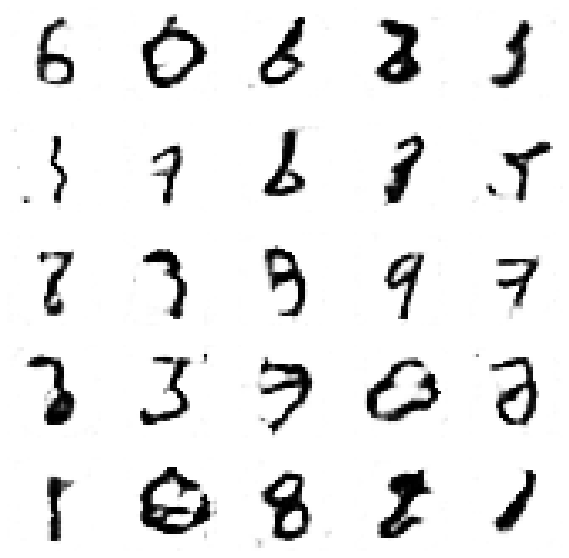

Epoch 11,Disc loss 0.6490591731336381 , Generator loss 1.095951351345095
Epoch 12,Disc loss 0.6455386359976907 , Generator loss 1.1022999979491928
Epoch 13,Disc loss 0.6391264779063371 , Generator loss 1.1131200637572851
Epoch 14,Disc loss 0.6353512563639216 , Generator loss 1.1244466666482453
Epoch 15,Disc loss 0.6304794505365894 , Generator loss 1.1432013526940956
Epoch 16,Disc loss 0.6274852372514896 , Generator loss 1.1555043387616801
Epoch 17,Disc loss 0.6263538895127101 , Generator loss 1.1725097461643381
Epoch 18,Disc loss 0.6236383809238417 , Generator loss 1.1837908268993735
Epoch 19,Disc loss 0.6185821948143152 , Generator loss 1.2018996762414265
Epoch 20,Disc loss 0.6160721292989886 , Generator loss 1.2199703531387525


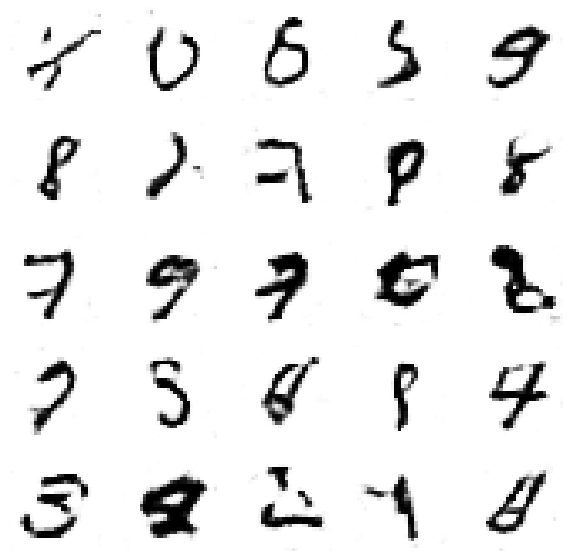

Epoch 21,Disc loss 0.6134315701121957 , Generator loss 1.2365290364648542
Epoch 22,Disc loss 0.6104154573419155 , Generator loss 1.2500059584267118
Epoch 23,Disc loss 0.6096801324150501 , Generator loss 1.26373887877179
Epoch 24,Disc loss 0.6041237993372811 , Generator loss 1.2786315037653997
Epoch 25,Disc loss 0.6020508878506147 , Generator loss 1.2941034736796322


KeyboardInterrupt: 

In [12]:
X_train=X_train.reshape(-1,28,28,1)
d_losses=[]
g_losses=[ ]
for epo in range(epoch):
    epdloss=0.0
    epgloss=0.0
    for step in range(batch_no):
        idx=np.random.randint(0,60000,half_batch)
        real_img=X_train[idx]
        noise=np.random.normal(0,1,size=(half_batch,NOISE_DIM))
        fake_img=generator.predict(noise)
        real_y=np.ones((half_batch,1))*0.9
        fake_y=np.zeros((half_batch,1))
        
        d_loss_real=descriminator.train_on_batch(real_img,real_y)
        d_loss_fake=descriminator.train_on_batch(fake_img,fake_y)
        
        
        d_loss=0.5*d_loss_real + 0.5*d_loss_fake
        epdloss += d_loss
        
        noise=np.random.normal(0,1,size=(batch_size,NOISE_DIM))
        ground_y=np.ones((batch_size,1))
        g_loss=model.train_on_batch(noise,ground_y)
        epgloss += g_loss
        
    print(f"Epoch {epo+1},Disc loss {epdloss/batch_no} , Generator loss {epgloss/batch_no}")
    d_losses.append(epdloss/batch_no)
    g_losses.append(epgloss/batch_no)
        
    if(epo+1)%10==0:
        generator.save("generator.h5")
        display_img()
    